<a href="https://colab.research.google.com/github/obaldin/DesafioAluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge Alura Store

Este desafio faz parte do curso de Data Science promovido pelo programa ONE em parceria com a Alura. Abaixo será analisado os dados de 4 lojas da rede Alura Store do Senhor João, a qual será decidido qual delas deverá ser vendida para ele iniciar um novo empreendimento. O projeto inclui analisar os dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store. O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

A análise consiste em 4 partes:

**Primeira:** carregamento dos dados e análise do faturamento, vendas por categoria, média da avaliação das lojas, produtos mais e menos vendidos, frete médio por loja.

**Segundo:** plotagem dos gráficos para uma análise visual.

**Terceiro:** conclusão sobre a loja que deverá ser vendida.

# Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

#função para ler CSV a partir da URL
def ler_csv(url):
  dados = []
  with urlopen(url) as resposta:
    linhas = resposta.read().decode('utf-8').splitlines()
    leitor = csv.DictReader(linhas)
    for linha in leitor:
        dados.append(linha)
  return dados

# Análise do faturamento
faturamento_total = 0

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    faturamento_loja = 0

    for venda in dados_loja:
        preco = float(venda['Preço']) #aqui somamos apenas o preço
        faturamento_loja += preco

    print(F'Faturamento Loja {i+1}: R${faturamento_loja:.2f}')
    faturamento_total += faturamento_loja

# Mostrar o faturamento total
print(f'\nFaturamento total de todas as lojas: R${faturamento_total:.2f}')

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria


In [3]:
# Função para ler CSV a partir da URL
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Dicionário para armazenar as vendas por categoria
vendas_por_categoria = {}

#Analisar todas as lojas
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    print(f"\nVendas por categoria na Loja {i+1}:")

    #Criar o Dicionário da loja atual
    categorias_loja = {}

    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade

        #Adicionar ao dicionário da loja atual
        if categoria in categorias_loja:
            categorias_loja[categoria] += valor_venda
        else:
            categorias_loja[categoria] = valor_venda


        #Adicionar ao dicionário geral
        if categoria in vendas_por_categoria:
          vendas_por_categoria[categoria] += valor_venda
        else:
          vendas_por_categoria[categoria] = valor_venda


    # Mostrar resultados para esta loja em ordem decrescente de valor
    print("-" * 30)  # Linha separadora
    print(f"{'Categoria':22} {'Valor':<10}")  # Cabeçalho da tabela
    print("-" * 30)  # Linha separadora

    for categoria, valor in sorted(categorias_loja.items(), key=lambda item: item[1], reverse=True):
        print(f"{categoria:<22}: R$ {valor:.2f}")
    print(f"\n")

#Exibir resultados totais
print("\nVendas totais por categoria (todas as lojas):")
print("-" * 30)  # Linha separadora
print(f"{'Categoria':22} {'Valor':<10}")  # Cabeçalho da tabela
print("-" * 30)  # Linha separadora
for categoria, valor in vendas_por_categoria.items():
    print(f"{categoria:<22}: R$ {valor:.2f}")

# Calcular o total geral
total_geral = sum(vendas_por_categoria.values())
print(f"\n\n{'-' * 30}")  # Linha separadora
print(f"Total geral de vendas: R$ {total_geral:.2f}")
print("-" * 30)  # Linha separadora


Vendas por categoria na Loja 1:
------------------------------
Categoria              Valor     
------------------------------
eletronicos           : R$ 1720525.18
eletrodomesticos      : R$ 1376501.27
moveis                : R$ 777243.14
instrumentos musicais : R$ 369322.34
esporte e lazer       : R$ 169179.18
brinquedos            : R$ 65412.04
utilidades domesticas : R$ 51092.72
livros                : R$ 34360.24



Vendas por categoria na Loja 2:
------------------------------
Categoria              Valor     
------------------------------
eletronicos           : R$ 1715519.72
eletrodomesticos      : R$ 1368304.66
moveis                : R$ 703108.03
instrumentos musicais : R$ 392599.48
esporte e lazer       : R$ 108879.57
brinquedos            : R$ 62300.37
utilidades domesticas : R$ 56984.93
livros                : R$ 41887.42



Vendas por categoria na Loja 3:
------------------------------
Categoria              Valor     
------------------------------
eletronicos        

# 3. Média de Avaliação das Lojas

In [4]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados


# Calcular a avaliação média para cada loja
print("Avaliação média da loja:")
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)

    # Variáveis para cálculo da média
    soma_avaliacoes = 0
    quantidade_produtos = 0

    for produto in dados_loja:
        try:
            # Tentamos com diferentes possíveis nomes de coluna
            if 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            else:
                # Se não encontramos a coluna, imprimimos as chaves disponíveis
                print(f"Chaves disponíveis na loja {i+1}:", produto.keys())
                raise KeyError("Não encontramos a coluna de avaliação")

            soma_avaliacoes += avaliacao
            quantidade_produtos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que não podem ser convertidos para float
            continue

    if quantidade_produtos > 0:
        avaliacao_media = soma_avaliacoes / quantidade_produtos
        print(f"Loja {i+1}: {avaliacao_media:.2f}")
    else:
        print(f"Não foi possível processar as avaliações para a Loja {i+1}")

Avaliação média da loja:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [5]:
from collections import defaultdict
from urllib.request import urlopen
import csv

def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Função que calcula os 3 produtos mais vendidos e que menos dinheiro geraram
def top_produtos(dados_loja, numero_loja):
    ingreso_por_produto = defaultdict(float)

    for venda in dados_loja:
        produto = venda['Produto']
        preco = float(venda['Preço'])
        # Agora usamos apenas o preço (não multiplicamos pela quantidade de parcelas)
        ingreso_por_produto[produto] += preco

    # Convertendo para lista ordenada
    produtos_ordenados = sorted(ingreso_por_produto.items(), key=lambda x: x[1], reverse=True)

    top_mais_vendidos = produtos_ordenados[:3]
    top_menos_vendidos = produtos_ordenados[-3:]

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    print("-" * 30)  # Linha separadora
    print(f"{'Produto':22} {'Ingressos':<10}")  # Cabeçalho da tabela
    print("-" * 30)  # Linha separadora
    for produto, ingreso in top_mais_vendidos:
        print(f"{produto:<22} R$ {ingreso:.2f}")

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    print("-" * 30)  # Linha separadora
    print(f"{'Produto':22} {'Ingressos':<10}")  # Cabeçalho da tabela
    print("-" * 30)  # Linha separadora
    for produto, ingreso in top_menos_vendidos:
        print(f"{produto:<22} R${ingreso:.2f}")

# Percorrer todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    top_produtos(dados_loja, i)


Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
------------------------------
Produto                Ingressos 
------------------------------
TV Led UHD 4K          R$ 189534.28
Geladeira              R$ 149524.28
Celular Plus X42       R$ 130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
------------------------------
Produto                Ingressos 
------------------------------
Cubo mágico 8x8        R$929.27
Dinossauro Rex         R$918.40
Corda de pular         R$870.89

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
------------------------------
Produto                Ingressos 
------------------------------
Celular Plus X42       R$ 150967.83
TV Led UHD 4K          R$ 137833.06
Geladeira              R$ 130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
------------------------------
Produto                Ingressos 
------------------------------
Corda de pular         R$1142.54
Dinossauro Rex         R$1027.41
Cubo mágico 8x8        R$858

# 5. Frete Médio por Loja


In [6]:
print("\nEnvio médio por loja:")
def calcular_envio_promedio(dados_loja, numero_loja):
    custos_envio = []

    for venda in dados_loja:
        custo_envio = float(venda['Frete'])
        custos_envio.append(custo_envio)

    envio_promedio = sum(custos_envio) / len(custos_envio) if custos_envio else 0

    print(f"Loja {numero_loja}: R${envio_promedio:.2f}")

# Processar todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    calcular_envio_promedio(dados_loja, i)


Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


# 6. Gráficos

## 6.1 Gráfico de barras: Receitas Totais por Loja

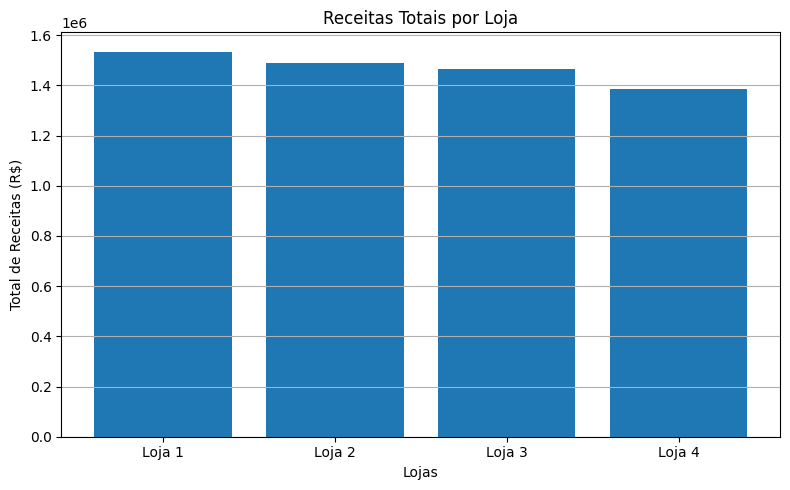

In [7]:
import matplotlib.pyplot as plt

# Criar lista da receita total para cada loja
faturamento_das_lojas = []

#Calcular o faturamento de cada loja
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    faturamento_loja = 0
    for venda in dados_loja:
        preco = float(venda['Preço'])
        faturamento_loja += preco
    faturamento_das_lojas.append(faturamento_loja)
    faturamento_total += faturamento_loja

# Criar o gráfico de barras
lojas = [f'Loja {i+1}' for i in range(len(faturamento_das_lojas))]
plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamento_das_lojas)
plt.title('Receitas Totais por Loja')
plt.xlabel('Lojas')
plt.ylabel('Total de Receitas (R$)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 6.2 Gráfico de linhas: Receita Média por venda por loja

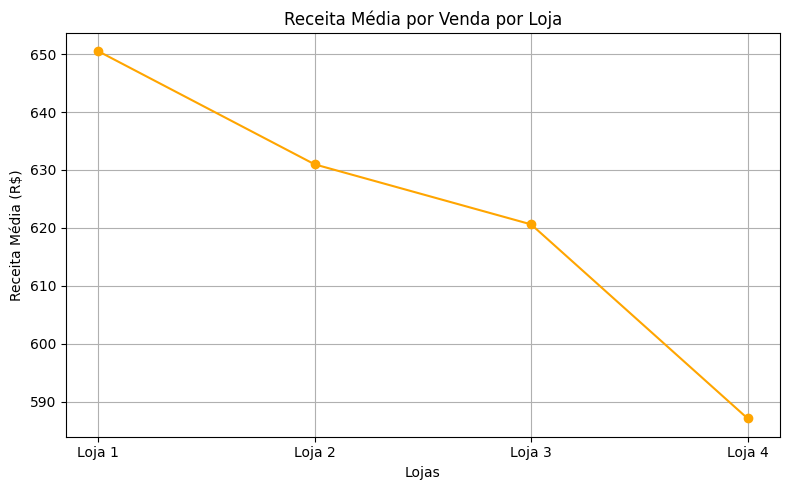

In [8]:
import matplotlib.pyplot as plt

# Calcular a receita média por venda por loja
receita_media_por_loja = [faturamento / len(ler_csv(url)) for faturamento, url in zip(faturamento_das_lojas, urls)]

# Criar o gráfico de linhas
lojas = [f'Loja {i+1}' for i in range(len(receita_media_por_loja))]
plt.figure(figsize=(8, 5))
plt.plot(lojas, receita_media_por_loja, marker='o', linestyle='-', color='orange')
plt.title('Receita Média por Venda por Loja')
plt.xlabel('Lojas')
plt.ylabel('Receita Média (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 6.3 Gráfico de pizza: Participação de cada Loja no Faturamento Total

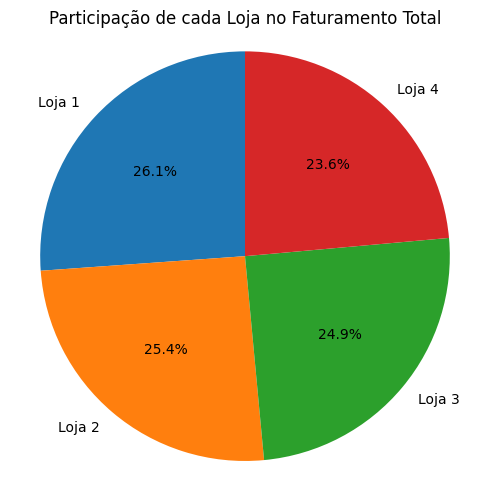

In [9]:
# Calcular a participação de cada loja no faturamento total
participacao_faturamento = [faturamento / faturamento_total for faturamento in faturamento_das_lojas]

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(participacao_faturamento, labels=lojas, autopct='%1.1f%%', startangle=90)
plt.title('Participação de cada Loja no Faturamento Total')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 6.4 Gráfico treemap: Quantidade de venda de cada loja por Estado

In [10]:
#carregando os dados para analisar as coordenadas de vendas de cada loja
import pandas as pd
from urllib.request import urlopen
import csv

#recarregado função ler_csv
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Re-carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Criar um dicionário para armazenar as vendas por coordenadas
vendas_por_coordenadas = {}

# Processar os dados
for url in urls:
    dados_loja = ler_csv(url)
    for item in dados_loja:
        try:
            lat = float(item['lat'])
            lon = float(item['lon'])
            # Calcular o faturamento multiplicando preço pela quantidade de parcelas
            faturamento_item = float(item['Preço']) * int(item['Quantidade de parcelas'])

            # Criar uma chave única para cada par de coordenadas
            chave = (lat, lon)

            # Adicionar o faturamento à chave correspondente
            if chave in vendas_por_coordenadas:
                vendas_por_coordenadas[chave] += faturamento_item
            else:
                vendas_por_coordenadas[chave] = faturamento_item
        except (ValueError, KeyError):
            # Ignorar linhas com dados ausentes ou inválidos nas colunas necessárias
            continue


# Analisar os resultados
for coordenadas, total_vendas in vendas_por_coordenadas.items():
    print(f'Coordenadas: {coordenadas}, Total de Vendas: R${total_vendas:.2f}')

Coordenadas: (-22.19, -48.79), Total de Vendas: R$6609953.98
Coordenadas: (-22.25, -42.66), Total de Vendas: R$2467227.69
Coordenadas: (-15.83, -47.86), Total de Vendas: R$497213.33
Coordenadas: (-30.17, -53.5), Total de Vendas: R$1122954.12
Coordenadas: (-18.1, -44.38), Total de Vendas: R$1990091.32
Coordenadas: (-5.2, -39.53), Total de Vendas: R$283555.46
Coordenadas: (-19.19, -40.34), Total de Vendas: R$329353.41
Coordenadas: (-13.29, -41.71), Total de Vendas: R$583112.37
Coordenadas: (-9.46, -48.26), Total de Vendas: R$74453.29
Coordenadas: (-24.89, -51.55), Total de Vendas: R$845732.66
Coordenadas: (1.41, -51.77), Total de Vendas: R$9191.61
Coordenadas: (-15.98, -49.86), Total de Vendas: R$436887.31
Coordenadas: (-9.62, -36.82), Total de Vendas: R$98313.79
Coordenadas: (-6.6, -42.28), Total de Vendas: R$99805.71
Coordenadas: (-8.38, -37.86), Total de Vendas: R$418361.34
Coordenadas: (-3.47, -65.1), Total de Vendas: R$23241.92
Coordenadas: (-5.81, -36.59), Total de Vendas: R$116654

In [11]:
# instalação das bibliotecas matplotlib e seaborn

!pip install matplotlib seaborn

In [12]:
import pandas as pd
import plotly.express as px
from urllib.request import urlopen
import csv

#recarregado função ler_csv
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Recarregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Carregar e concatenar os dados de todas as lojas
lista_dados = []
for url in urls:
    # Usar pd.read_csv para carregar diretamente para um DataFrame
    df_loja = pd.read_csv(url)
    # Adicionar uma coluna 'loja' para identificar a loja de origem
    df_loja['loja'] = f"Loja {urls.index(url) + 1}"
    lista_dados.append(df_loja)

# Concatenar todos os DataFrames em um único DataFrame
dados_todas_lojas = pd.concat(lista_dados, ignore_index=True)


# Agrupando os dados por loja e estado para somar o total de vendas
# Certificar que as colunas existem no DataFrame combinado
if 'loja' in dados_todas_lojas.columns and 'Local da compra' in dados_todas_lojas.columns and 'Preço' in dados_todas_lojas.columns:
    vendas_estado_loja = dados_todas_lojas.groupby(['loja', 'Local da compra'])['Preço'].sum().reset_index()
    vendas_estado_loja.columns = ['Loja', 'Estado', 'Preço']

    # Define the custom color map
    cor_mapa_personalizado = {
        'Loja 1': 'blue',
        'Loja 2': 'orange',
        'Loja 3': 'green',
        'Loja 4': 'red'
    }

    # Criar o gráfico Treemap
    fig = px.treemap(
        vendas_estado_loja,
        path=['Loja', 'Estado'],
        values='Preço',
        color='Loja',
        title='Quantidade de Vendas por Estado e por Loja',
        color_discrete_map=cor_mapa_personalizado
    )

    # Exibir o gráfico
    fig.show()
else:
    print("Colunas 'loja', 'Local da compra' ou 'Preço' não encontradas no DataFrame combinado.")

## 6.5 Gráfico de Linhas: Vendas Totais por Loja por Estado

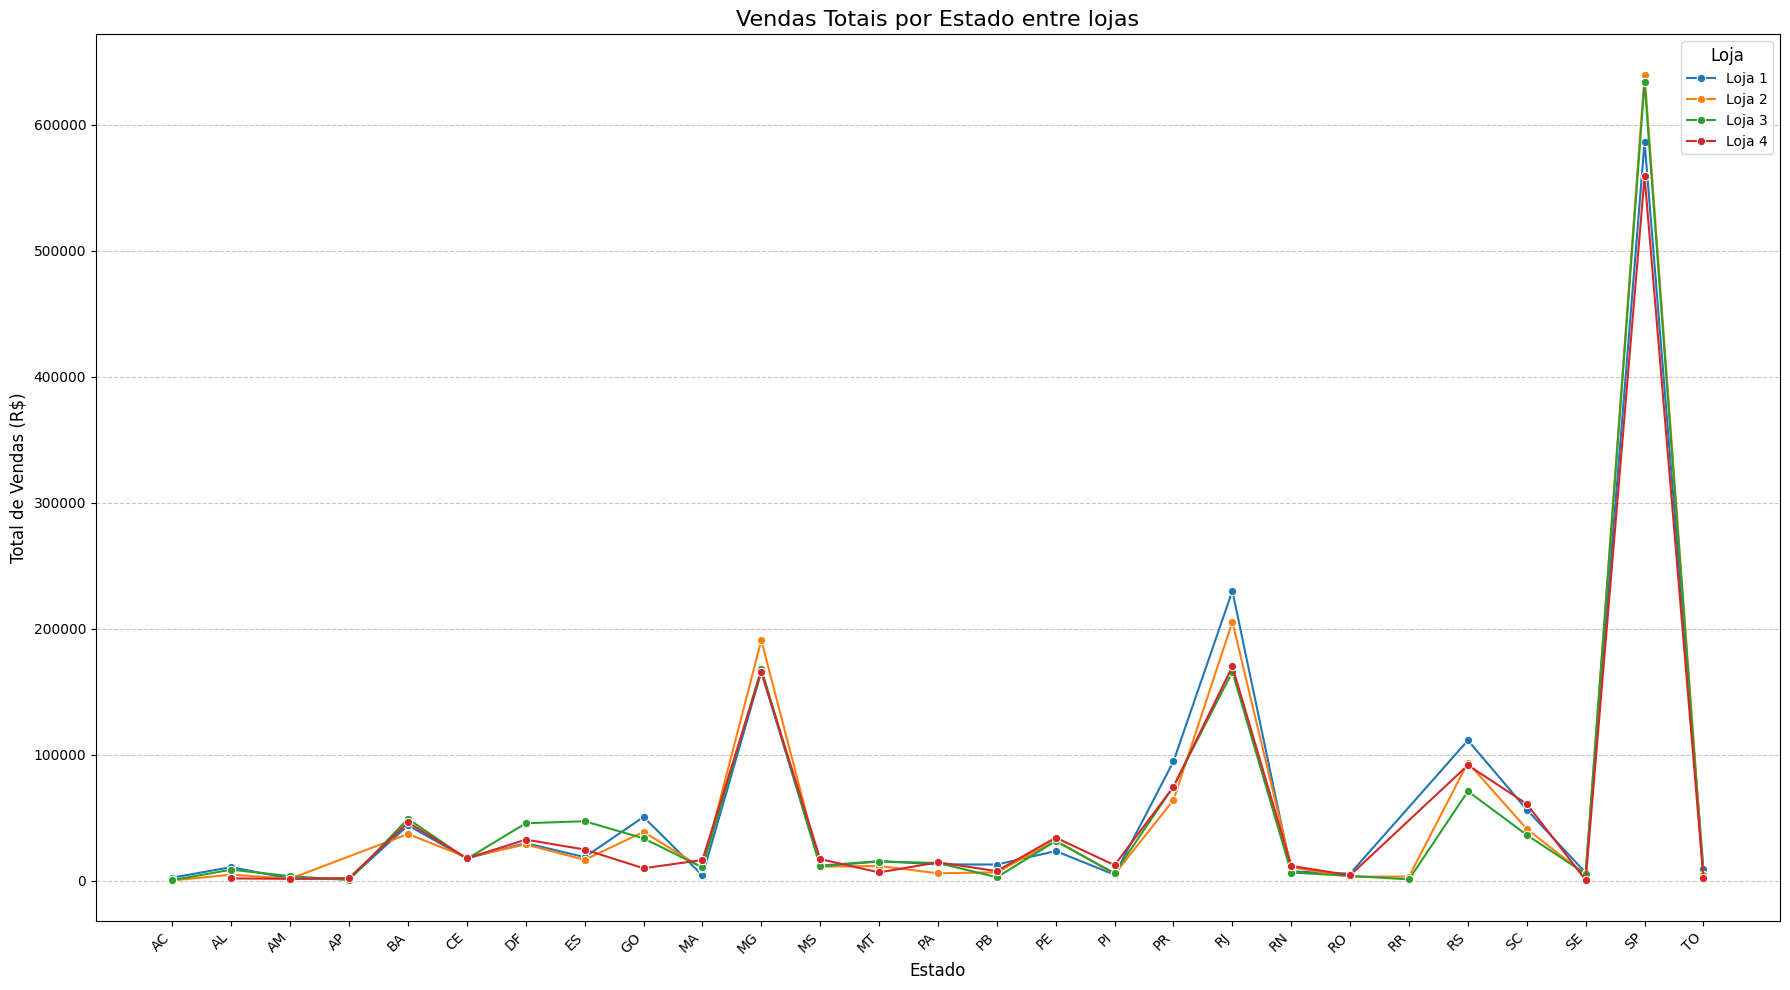

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from urllib.request import urlopen
import csv

#recarregar função ler_csv
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# recarregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Carregar e concatenar os DataFrames
lista_dados = []
for url in urls:
    df_loja = pd.read_csv(url)
    df_loja['loja'] = f"Loja {urls.index(url) + 1}"
    lista_dados.append(df_loja)

dados_todas_lojas = pd.concat(lista_dados, ignore_index=True)

# Verificar se as colunas existem no DataFrame
if 'loja' in dados_todas_lojas.columns and 'Local da compra' in dados_todas_lojas.columns and 'Preço' in dados_todas_lojas.columns:
    # Agrupar por "Local da compra" e "loja" e somar "Preço"
    vendas_por_estado_loja = dados_todas_lojas.groupby(['Local da compra', 'loja'])['Preço'].sum().reset_index()
    vendas_por_estado_loja.columns = ['Estado', 'Loja', 'Total Vendas']

    # Criar gráfico de linhas usando o DataFrame agrupado
    plt.figure(figsize=(18, 10)) # Aumentar o tamanho da figura para melhor visualização
    sns.lineplot(x='Estado', y='Total Vendas', hue='Loja', data=vendas_por_estado_loja, marker='o') # Remover sort=False
    plt.title('Vendas Totais por Estado entre lojas', fontsize=16)
    plt.xlabel('Estado', fontsize=12)
    plt.ylabel('Total de Vendas (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Loja', fontsize=10, title_fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("Colunas 'loja', 'Local da compra' ou 'Preço' não encontradas no DataFrame combinado.")

## 6.6 Gráfico de Barras: Vendas Totais por Loja por Estado

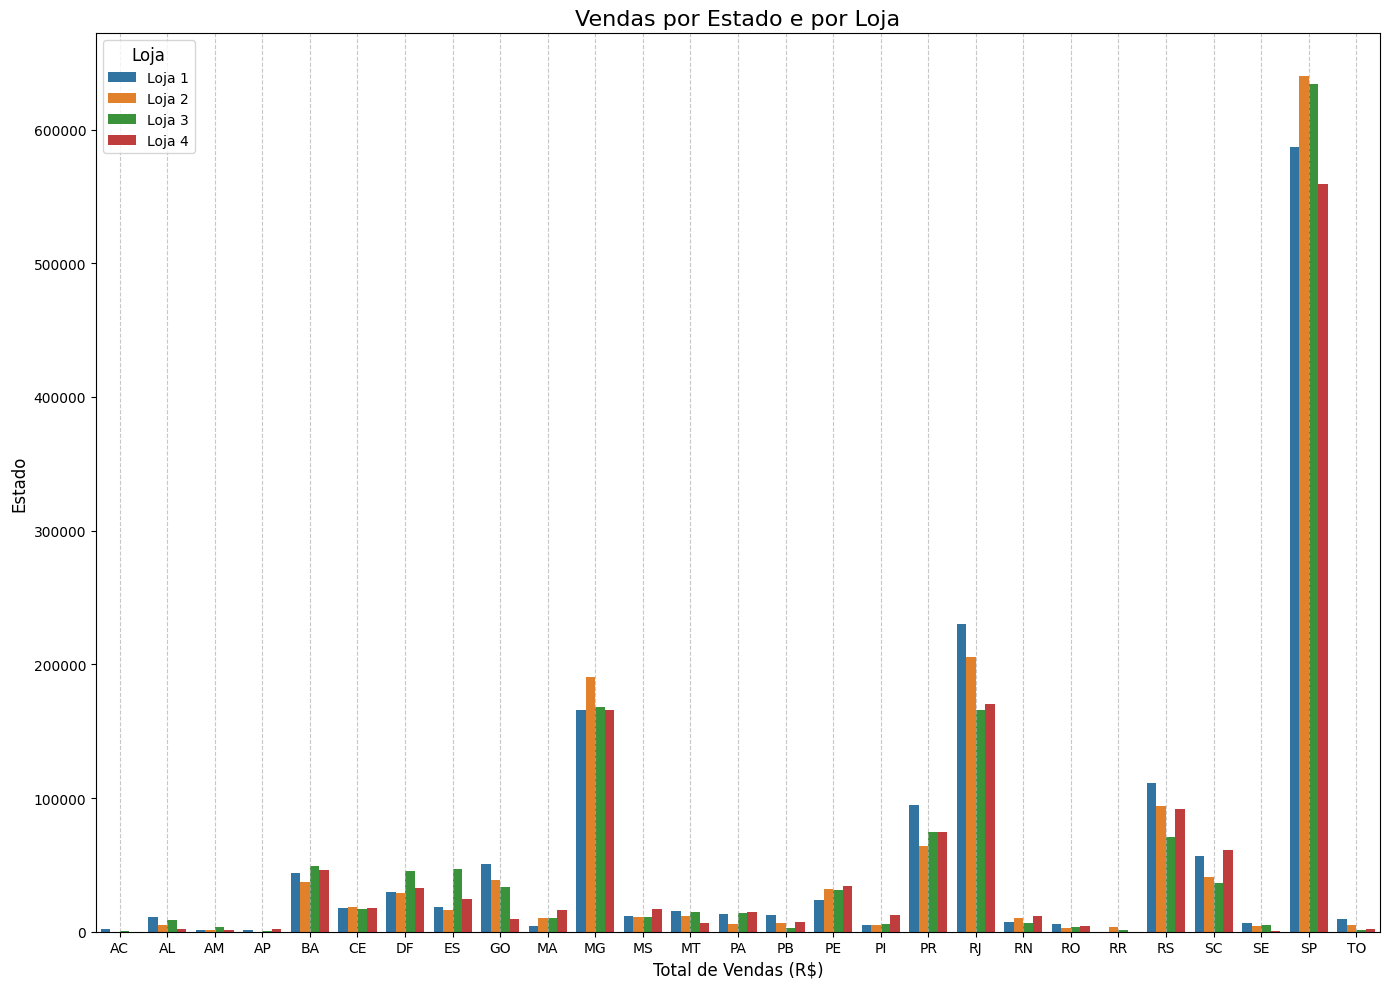

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from urllib.request import urlopen
import csv

#recarregar função ler_csv
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# recarregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Carregar e concatenar os DataFrames
lista_dados = []
for url in urls:
    df_loja = pd.read_csv(url)
    df_loja['loja'] = f"Loja {urls.index(url) + 1}"
    lista_dados.append(df_loja)

dados_todas_lojas = pd.concat(lista_dados, ignore_index=True)

# Verificar se as colunas existem no DataFrame
if 'loja' in dados_todas_lojas.columns and 'Local da compra' in dados_todas_lojas.columns and 'Preço' in dados_todas_lojas.columns:
    # Agrupar por "Local da compra" e "loja" e somar "Preço"
    vendas_por_estado_loja = dados_todas_lojas.groupby(['Local da compra', 'loja'])['Preço'].sum().reset_index()
    vendas_por_estado_loja.columns = ['Estado', 'Loja', 'Total Vendas']


    # Agrupar por loja para obter o total de vendas por loja
    total_vendas_por_loja = vendas_por_estado_loja.groupby('Loja')['Total Vendas'].sum().reset_index()

    # Ordenar as lojas pelo total de vendas para melhor visualização
    total_vendas_por_loja = total_vendas_por_loja.sort_values('Total Vendas', ascending=False)

    # Novo código para o gráfico de barras horizontais comparando vendas por estado e loja

    plt.figure(figsize=(14, 10)) # Ajustar o tamanho da figura
    sns.barplot(x='Estado', y='Total Vendas', hue='Loja', data=vendas_por_estado_loja)
    plt.title('Vendas por Estado e por Loja', fontsize=16)
    plt.xlabel('Total de Vendas (R$)', fontsize=12)
    plt.ylabel('Estado', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Loja', fontsize=10, title_fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade no eixo x
    plt.tight_layout()
    plt.show()


else:
    print("Colunas 'loja', 'Local da compra' ou 'Preço' não encontradas no DataFrame combinado.")

In [15]:
# Cálculo da loja que melhor atende a todos as regiões com base na análise do gráfico de linhas e de barras sobre as Vendas por Loja por Estado

# Agrupar por estado e loja para obter o total de vendas por estado e loja
vendas_por_estado_e_loja = dados_todas_lojas.groupby(['Local da compra', 'loja'])['Preço'].sum().reset_index()
vendas_por_estado_e_loja.columns = ['Estado', 'Loja', 'Total Vendas Estado Loja']

# Agrupar por estado para obter o total de vendas por estado (somando todas as lojas)
total_vendas_por_estado = dados_todas_lojas.groupby('Local da compra')['Preço'].sum().reset_index()
total_vendas_por_estado.columns = ['Estado', 'Total Vendas Estado']

# Juntar os dois dataframes para calcular a porcentagem
vendas_com_porcentagem = pd.merge(vendas_por_estado_e_loja, total_vendas_por_estado, on='Estado')

# Calcular a porcentagem de vendas por loja em cada estado
vendas_com_porcentagem['Porcentagem Vendas'] = (vendas_com_porcentagem['Total Vendas Estado Loja'] / vendas_com_porcentagem['Total Vendas Estado']) * 100

# Encontrar a loja com a maior porcentagem de vendas em cada estado
loja_melhor_por_estado = vendas_com_porcentagem.loc[vendas_com_porcentagem.groupby('Estado')['Porcentagem Vendas'].idxmax()]

# Contar quantas vezes cada loja foi a melhor
contagem_melhor_loja = loja_melhor_por_estado['Loja'].value_counts()

# A loja que mais vezes foi a melhor em um estado
loja_geralmente_melhor = contagem_melhor_loja.index[0] if not contagem_melhor_loja.empty else "Nenhuma loja encontrada"

#print(f"A loja que possui a melhor porcentagem de vendas na maioria dos estados é: {loja_geralmente_melhor}")

# Calcular a média da porcentagem de vendas para a loja escolhida em todos os estados
if loja_geralmente_melhor != "Nenhuma loja encontrada":
    porcentagens_loja_escolhida = vendas_com_porcentagem[vendas_com_porcentagem['Loja'] == loja_geralmente_melhor]['Porcentagem Vendas']
    media_porcentagem_loja_escolhida = porcentagens_loja_escolhida.mean()
    print(f"A loja que possui e melhor porcentagem de vendas na maioria dos estados é a {loja_geralmente_melhor} com média de {media_porcentagem_loja_escolhida:.1f}%")
else:
    print("Não foi possível calcular a média de porcentagem de vendas.")


A loja que possui e melhor porcentagem de vendas na maioria dos estados é a Loja 1 com média de 30.4%


# Análise Conclusiva

A partir da análise dos dados analisados sobre as lojas do Senhor João, a rede Alura Store, ponderemos sobre os principais indicadores como faturamento e avaliação média.

Em relação ao faturamento, os resultados obtidos foram:

1. Loja 1: R$ 1.534.509.12

2. Loja 2: R$ 1.488.459.06

3. Loja 3: R$ 1.464.025.03

4. Loja 4: R$ 1.384.497.58

Quanto à média de avaliação, os resultados foram:

1. Loja 3: 4.05

2. Loja 2: 4.04

3. Loja 4: 4.00

4. Loja 1: 3.98

A taxa de envio médio, apesar de não ser levada em consideração no faturamento de cada empresa, teve os seguintes resultados:

1. Loja 4: R$ 31,28

2. Loja 3: R$ 33,07

3. Loja 2: R$ 33,62

4. Loja 1: R$ 34,69

Em relação ao faturamento médio, particição percentual no faturamento e região de venda, a Loja 1 teve o melhor rendimento, apesar de ter uma avaliação média e um valor médio de frete piores.

A Loja 4, por mais que tenha a melhor custo médio de frete, teve o pior faturamento e a segunda pior média de avaliação entre as 4 lojas.

A Loja 1, mesmo com uma pior avaliação e maior custo de envio, é a que mais fatura, por isso é uma loja valiosa. Merece uma avaliação mais detalhada para entender as causas da baixa avaliação e custo maior de envio para tentar melhorá-los.

Desta forma, recomenda-se que a Loja 4 seja a mais indicada para venda, considerando o menor retorno financeiro e contribuição geral.